### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [400]:
data = pd.read_csv('C:\\AIML\\data\\coupons.csv')

In [401]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [345]:
# Check for null values in the entire DataFrame
# Get columns with null values
null_columns = data.columns[data.isnull().any()].tolist()
print(null_columns)

['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


3. Decide what to do about your missing data -- drop, replace, other...

In [346]:
#from the columns identified with null values filling it with "never"
data[['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']] = data[['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50']].fillna("never")
data_new = data
data = data_new

4. What proportion of the total observations chose to accept the coupon?



In [347]:
# Calculate proportion of value 1 in 'Y'
proportion = data['Y'].value_counts(normalize=True)[1]

print(proportion) 

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

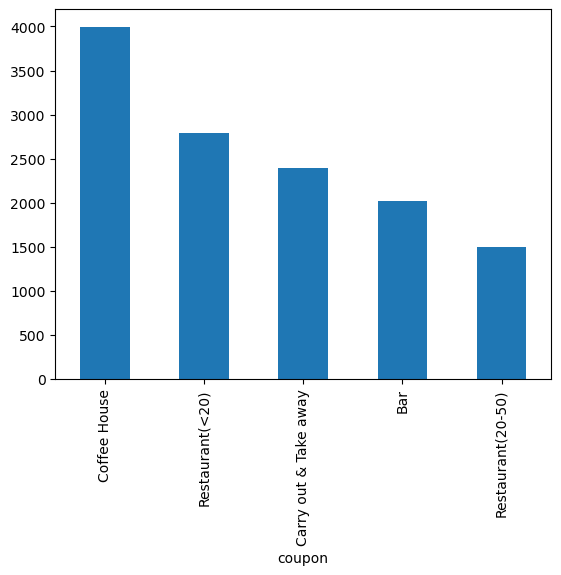

In [348]:
# Count the occurrences of each value in coupon column
coupon_counts = data['coupon'].value_counts()

# Create the bar plot
coupon_counts.plot(kind='bar')

6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

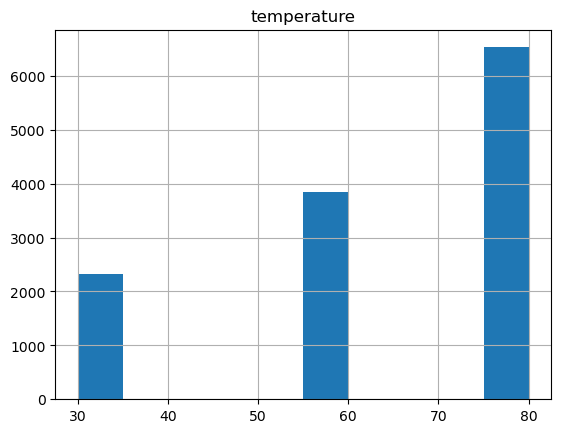

In [349]:
# create histo in temperatues column
data.hist(column='temperature')



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [350]:
bar_coupon_data = data[data['coupon'] == "Bar"] 
bar_coupon_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [351]:
# Calculate proportion of value 1 in 'Y'
bar_proportion = bar_coupon_data['Y'].value_counts(normalize=True)[1]

print(bar_proportion) 

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Drivers going to bar 3 times or fewer a month has accepted coupons 4 times more than who went frequently
674 153 4.405228758169935


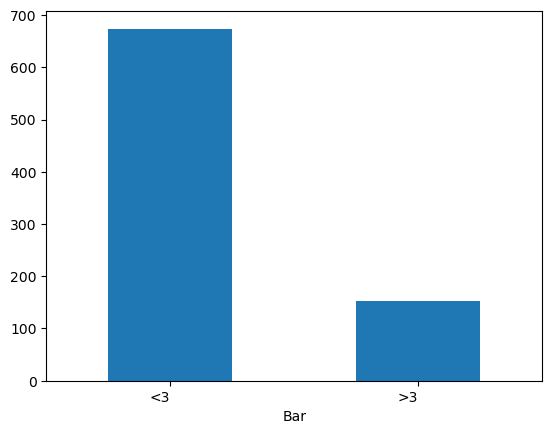

In [355]:
bar_coupon_data_accepted = bar_coupon_data[bar_coupon_data['Y'] == 1] 

bar_lessthan3 = bar_coupon_data_accepted[bar_coupon_data_accepted['Bar'].isin(['less1','never','1~3'])]['Bar'].value_counts().sum()
bar_lessthan3
bar_gtthan3 = bar_coupon_data_accepted[bar_coupon_data_accepted['Bar'].isin(['4~8','gt8'])]['Bar'].value_counts().sum()
bar_gtthan3
acceptancerate = bar_lessthan3/bar_gtthan3
print ('Drivers going to bar 3 times or fewer a month has accepted coupons 4 times more than who went frequently')
print(bar_lessthan3,bar_gtthan3,acceptancerate)

#creating a bar plot to view the results 
bar_accepted_plot = bar_coupon_data_accepted.copy()
bar_accepted_plot['Bar'] = bar_accepted_plot['Bar'].str.replace('less1', '<3').str.replace('never', '<3').str.replace('1~3', '<3').str.replace('4~8', '>3').str.replace('gt8', '>3')
ax=bar_accepted_plot.Bar.value_counts().plot(kind='bar')
# Rotate x-axis labels by 45 degrees

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right') 



plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


292 535 0.5457943925233645
drivers who go to a bar more than once a month and are over the age of 25 is 50% less than all others


<Axes: xlabel='age', ylabel='Bar'>

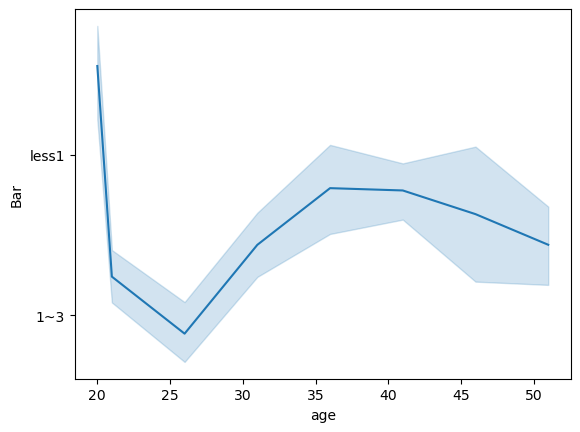

In [364]:

bar_coupon_data_accepted["age"] = bar_coupon_data_accepted["age"].str.replace("50plus", "51").str.replace("below21", "20").astype('int')
bar_coupon_data_accepted = bar_coupon_data_accepted
filter_list=['1~3','gt8','4~8']

bar_age = bar_coupon_data_accepted[['age','Bar']]


bar_age = bar_coupon_data_accepted[['age','Bar']]
bar_driver_age = bar_age.query("Bar == @filter_list")
bar_driver_age = bar_driver_age[(bar_driver_age['age'] > 25)]
#merge used to find other rows that doesnt meet the condtion
bar_others= (pd.merge(bar_age,bar_driver_age, indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))

acceptancerate_driver_age = bar_driver_age.shape[0]/ bar_others.shape[0]
print(bar_driver_age.shape[0], bar_others.shape[0], acceptancerate_driver_age)
print('drivers who go to a bar more than once a month and are over the age of 25 is 50% less than all others')

sns.lineplot(data=bar_age, x='age', y='Bar')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [367]:
filter_list=['1~3','gt8','4~8']
#bar_coupon_data_accepted["age"] = bar_coupon_data_accepted.loc[bar_coupon_data_accepted.age == '50plus', 'age'] = '51'
df_scenario5 = bar_coupon_data_accepted[['passanger','Bar','occupation']]
df_scenario5_new = df_scenario5.query(("Bar == @filter_list"))

df_scenario5_new = df_scenario5_new [df_scenario5_new['passanger'] != "Kid(s)"]

list1 = ['farming', 'fishing','forestry']
 
# filter in name column
df_scenario5_new = df_scenario5_new[~df_scenario5_new['occupation'].isin(list1)]
result5 =  (pd.merge(df_scenario5,df_scenario5_new, indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))

acceptance_scenario5 = df_scenario5_new.shape[0]/result5.shape[0]

print(df_scenario5_new.shape[0],result5.shape[0], acceptance_scenario5)


393 434 0.9055299539170507
There is no major diffrence, Passangers and occupation did not help with acceptance


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [372]:

df_scenario6_1 = bar_coupon_data_accepted[['passanger','Bar','maritalStatus']]
df_scenario6_1 = df_scenario6_1.query(("Bar == @filter_list"))
df_scenario6_1 = df_scenario6_1 [df_scenario6_1['passanger'] != "Kid(s)"]
df_scenario6_1 = df_scenario6_1 [df_scenario6_1['maritalStatus'] != "Widowed"]
df_scenario6_1

df_scenario6_2 = bar_coupon_data_accepted[['Bar','age']]

df_scenario6_2 = df_scenario6_2.query(("Bar == @filter_list & age < 30"))
df_scenario6_2

# assuming Restaurant < 20 in the coupons columns s the cheap restaurant
res_coupon_data = data.query("coupon == 'Restaurant(<20)' & Y  == 1")
filter_res_list = ['gt8','4~8']
df_scenario6_3 = res_coupon_data[['RestaurantLessThan20','income']]
df_scenario6_3["income"] = df_scenario6_3['income'].str.replace("$","")
df_scenario6_3["income"] = df_scenario6_3['income'].str.replace("Less than","").str[:6].str.strip().astype('int')
df_scenario6_3 = df_scenario6_3.query(("RestaurantLessThan20 == @filter_list & income < 50000"))
df_scenario6_3

print(df_scenario6_1.shape[0],df_scenario6_2.shape[0], df_scenario6_3.shape[0])
print("drivers go to cheap restaurants more than 4 times a month and income is less than 50K. is accepting coupons more than drivers going to Bars more than once a month")


393 249 812
drivers go to cheap restaurants more than 4 times a month and income is less than 50K. is accepting coupons more than drivers going to Bars more than once a month


C:\Users\H468030\AppData\Local\Temp\ipykernel_19532\4280614249.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scenario6_3["income"] = df_scenario6_3['income'].str.replace("$","")
C:\Users\H468030\AppData\Local\Temp\ipykernel_19532\4280614249.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scenario6_3["income"] = df_scenario6_3['income'].str.replace("Less than","").str[:6].str.strip().astype('int')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

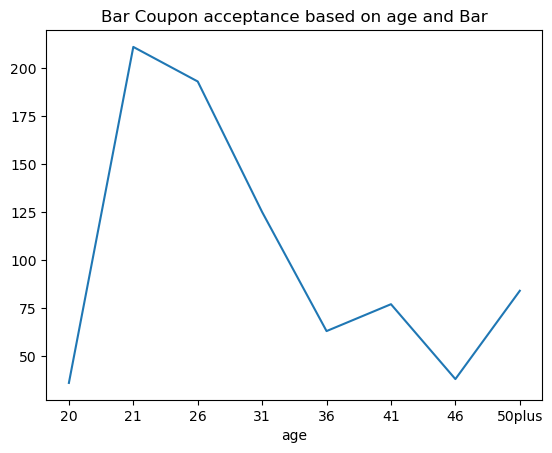

people below age 26 accepted more coupons


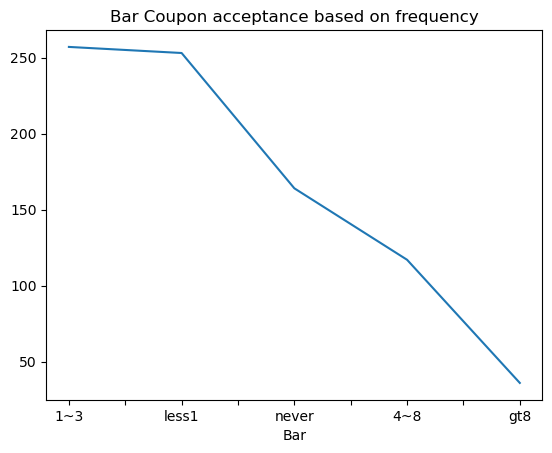

people going to bar less than 3 times a months accepted more coupons than people visiting frequently


In [414]:

bar_accepted_plot['age'] = bar_accepted_plot['age'].str.replace("below21","20") 
bar_accepted_plot.age.value_counts().sort_index().plot(kind='line')
plt.title('Bar Coupon acceptance based on age and Bar')

plt.show()

print("people below age 26 accepted more coupons") 


bar_coupon_data_accepted.Bar.value_counts().plot(kind='line')
plt.title('Bar Coupon acceptance based on frequency')

plt.show()

print("people going to bar less than 3 times a months accepted more coupons than people visiting frequently") 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Drivers who travel with alone passangers accepts 10 times more than other scenarios


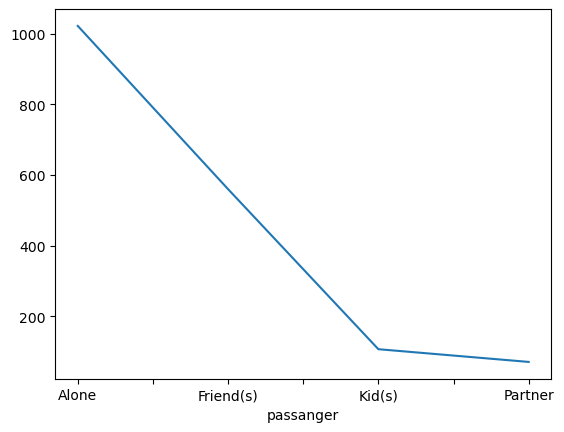

In [415]:
COTA_coupon_data = data[(data['coupon'] == "Carry out & Take away") & data['Y'] == 1 ] 
COTA_coupon_data.passanger.value_counts().sort_index().plot(kind='line')
print("Drivers who travel with alone passangers accepts 10 times more than other scenarios")

There is no difference in accepatnce rate between Female and Male driver


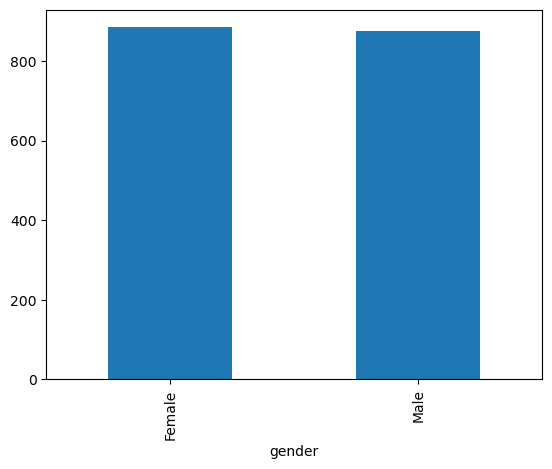

In [416]:
COTA_coupon_data.gender.value_counts().sort_index().plot(kind='bar')
print("There is no difference in accepatnce rate between Female and Male driver")

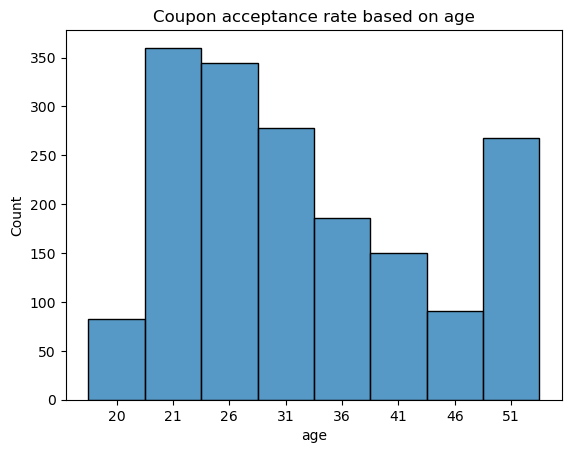

drivers from age 21 - 30 accepted more coupons while drivers under 21 showed less interest


In [397]:
COTA_coupon_data['age'] = COTA_coupon_data['age'].str.replace("below21","20").str.replace("50plus","51")
# Sort the DataFrame by the 'value' column
COTA_coupon_data = COTA_coupon_data.sort_values('age')
# Create the histplot
sns.histplot(data=COTA_coupon_data, x='age')
plt.title('Coupon acceptance rate based on age')
plt.show()
print('drivers from age 21 - 30 accepted more coupons while drivers under 21 showed less interest')

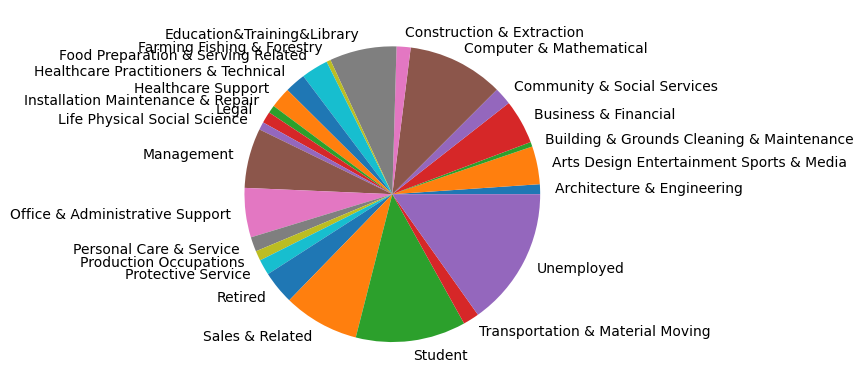

the pie chart helps in finding the outliers


In [417]:


# Data preparation
COTA_grouped = COTA_coupon_data.groupby('occupation')['income'].count().reset_index()

# Creating a pie chart
plt.pie(COTA_grouped['income'], labels=COTA_grouped['occupation'])

plt.show()

print("the pie chart helps in finding the outliers")

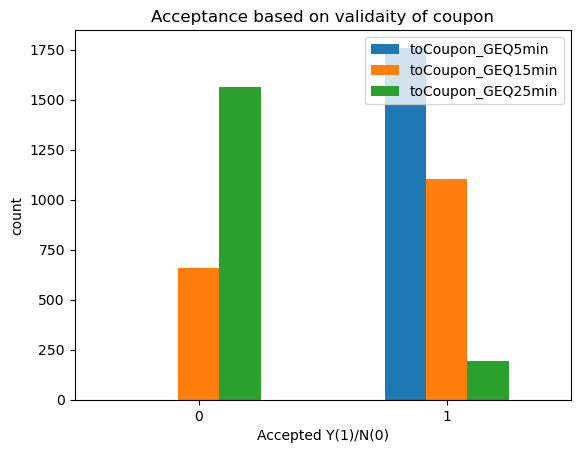

coupons having less validity(5min) are accepted than 25 min


In [423]:

COTA_coupon_data[['toCoupon_GEQ5min', 'toCoupon_GEQ15min','toCoupon_GEQ25min' ]].apply(pd.Series.value_counts).plot(kind='bar')
plt.title("Acceptance based on validaity of coupon")
plt.xlabel("Accepted Y(1)/N(0)")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()

print("coupons having less validity(5min) are accepted than 25 min")
